In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('./origin_data/train.csv')
train.drop(columns=['id'],inplace=True)
train = train.rename(columns = {'Num_H_Acceptors': 'Acceptors','Num_H_Donors': 'Donors','Num_RotatableBonds':'RotatableBonds'})
print(train.columns)
print(train.dtypes)
train.describe(include='all')


Index(['SMILES', 'MLM', 'HLM', 'AlogP', 'Molecular_Weight', 'Acceptors',
       'Donors', 'RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea'],
      dtype='object')
SMILES                         object
MLM                           float64
HLM                           float64
AlogP                         float64
Molecular_Weight              float64
Acceptors                       int64
Donors                          int64
RotatableBonds                  int64
LogD                          float64
Molecular_PolarSurfaceArea    float64
dtype: object


,SMILES,MLM,HLM,AlogP,Molecular_Weight,Acceptors,Donors,RotatableBonds,LogD,Molecular_PolarSurfaceArea
count,3498,3498.000000,3498.000000,3496.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
unique,3471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,COCCOc1cc(=O)n2c(c1C(=O)N1CCCC1)CCOCC2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.384742,53.090206,2.841399,363.881846,4.016581,1.098628,4.561178,2.682156,79.747278
std,NaN,35.695993,36.080081,1.608073,79.527022,1.511091,0.976266,2.357243,1.666996,28.849229
min,NaN,0.000000,0.000000,-4.137000,172.180000,0.000000,0.000000,0.000000,-4.920000,3.240000
25%,NaN,2.433000,15.905500,1.833000,304.389750,3.000000,0.000000,3.000000,1.620000,60.150000
50%,NaN,26.193000,58.023000,2.889000,350.255000,4.000000,1.000000,4.000000,2.709000,77.525000
75%,NaN,70.807250,87.753000,3.958250,409.744750,5.000000,2.000000,6.000000,3.860000,96.540000


scale

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

mlm_df = train.drop(columns=['SMILES','HLM']).fillna(0)
hlm_df = train.drop(columns=['SMILES','MLM']).fillna(0)

mlm_std = standard_scaler.fit_transform(mlm_df)
mlm_mima = minmax_scaler.fit_transform(mlm_df)
hlm_std = standard_scaler.fit_transform(hlm_df)
hlm_mima = minmax_scaler.fit_transform(hlm_df)

elbow method를 통한 최적의 클러스터 개수 탐색(MLM)

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 차원 축소 (2차원으로)
pca = PCA(n_components=2)
mlm_pca = pca.fit_transform(mlm_std)

c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

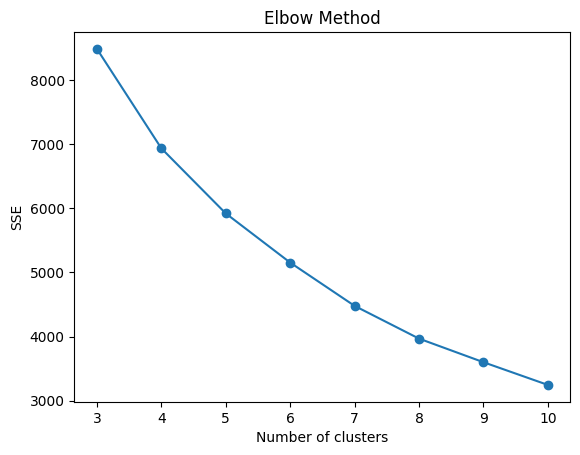

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 엘보우 방법
sse = []
for k in range(3, 11):  # 예를 들어 1부터 10까지의 클러스터 수를 시도
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mlm_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(3, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.36691469538363525


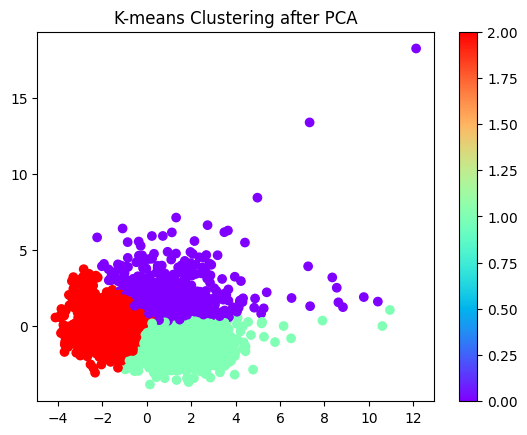

In [22]:
from sklearn.metrics import silhouette_score
# K-means 클러스터링
cluster = 3
kmeans = KMeans(n_clusters=cluster) 
clusters = kmeans.fit_predict(mlm_pca)
# 실루엣 점수 계산
score = silhouette_score(mlm_pca, clusters)
print(f"Silhouette Score: {score}")
# 클러스터별 인덱스 출력
for cluster_num in range(cluster):  
    indices_in_cluster = np.where(clusters == cluster_num)[0]
    indices_in_cluster = (indices_in_cluster+1).tolist()
    
# 결과 시각화
plt.scatter(mlm_pca[:, 0], mlm_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('K-means Clustering after PCA')
plt.colorbar()
plt.show()


elbow method를 통한 최적의 클러스터 개수 탐색(HLM)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 차원 축소 (2차원으로)
pca = PCA(n_components=2)
hlm_pca = pca.fit_transform(mlm_std)


c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

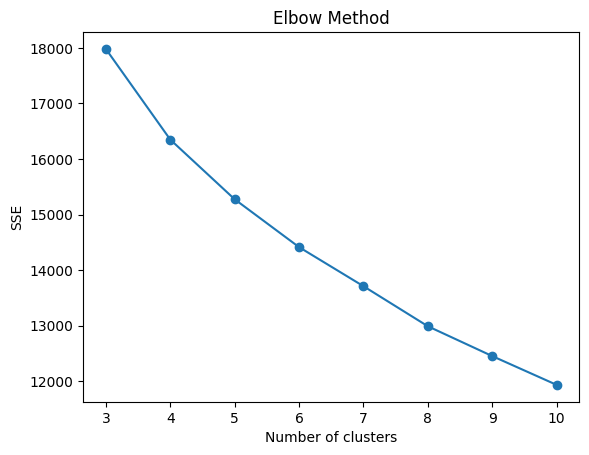

In [12]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 엘보우 방법
sse = []
for k in range(3, 11):  # 예를 들어 1부터 10까지의 클러스터 수를 시도
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(hlm_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(3, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.20787379342797116


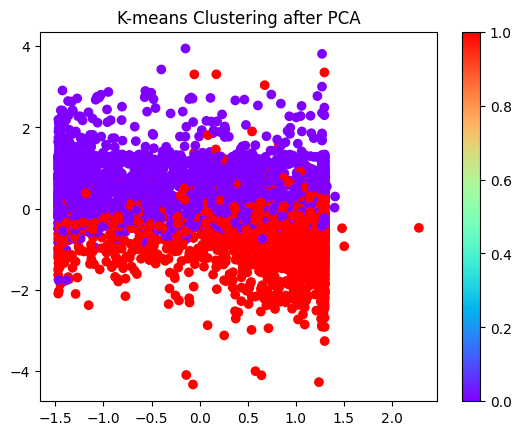

In [16]:
from sklearn.metrics import silhouette_score
# K-means 클러스터링
cluster = 2
kmeans = KMeans(n_clusters=cluster) 
clusters = kmeans.fit_predict(hlm_std)
# 실루엣 점수 계산
score = silhouette_score(hlm_std, clusters)
print(f"Silhouette Score: {score}")
# 클러스터별 인덱스 출력
for cluster_num in range(cluster):  
    indices_in_cluster = np.where(clusters == cluster_num)[0]
    indices_in_cluster = (indices_in_cluster+1).tolist()
    
# 결과 시각화
plt.scatter(hlm_std[:, 0], hlm_std[:, 1], c=clusters, cmap='rainbow')
plt.title('K-means Clustering after PCA')
plt.colorbar()
plt.show()
